In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Fri Mar  8 15:04:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Thiết lập các thông số
batch_size = 32
img_height = 100
img_width = 100
epochs = 10
num_classes = len(os.listdir('/content/drive/MyDrive/Car_Brand_Logos/Train'))

# Tạo dữ liệu augmentation và normalization cho dữ liệu train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Tạo dữ liệu normalization cho dữ liệu test
test_datagen = ImageDataGenerator(rescale=1./255)

# Tạo dữ liệu train
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Car_Brand_Logos/Train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Tạo dữ liệu test
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Car_Brand_Logos/Test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2513 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [4]:
# Xây dựng mô hình CNN thứ nhất
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [5]:
# Compile mô hình
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/10
78/78 [==============================] - 2266s 29s/step - loss: 2.0356 - accuracy: 0.2027 - val_loss: 1.9433 - val_accuracy: 0.3151
Epoch 2/10
78/78 [==============================] - 29s 378ms/step - loss: 1.6553 - accuracy: 0.4353 - val_loss: 1.5838 - val_accuracy: 0.5052
Epoch 3/10
78/78 [==============================] - 28s 359ms/step - loss: 1.3534 - accuracy: 0.5425 - val_loss: 1.4099 - val_accuracy: 0.5729
Epoch 4/10
78/78 [==============================] - 29s 375ms/step - loss: 1.1876 - accuracy: 0.6066 - val_loss: 1.3703 - val_accuracy: 0.6094
Epoch 5/10
78/78 [==============================] - 30s 383ms/step - loss: 1.0652 - accuracy: 0.6582 - val_loss: 1.3723 - val_accuracy: 0.6120
Epoch 6/10
78/78 [==============================] - 27s 348ms/step - loss: 0.9830 - accuracy: 0.6824 - val_loss: 1.3800 - val_accuracy: 0.6380
Epoch 7/10
78/78 [==============================] - 28s 355ms/step - loss: 0.8783 - accuracy: 0.7046 - val_loss: 1.2634 - val_accuracy: 0.6562

In [7]:
# Xây dựng mô hình CNN thứ hai
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [8]:
# Compile mô hình
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
78/78 [==============================] - 29s 352ms/step - loss: 2.0373 - accuracy: 0.1959 - val_loss: 1.9265 - val_accuracy: 0.3151
Epoch 2/10
78/78 [==============================] - 29s 371ms/step - loss: 1.7890 - accuracy: 0.3515 - val_loss: 1.6971 - val_accuracy: 0.4271
Epoch 3/10
78/78 [==============================] - 27s 346ms/step - loss: 1.5146 - accuracy: 0.4861 - val_loss: 1.4389 - val_accuracy: 0.5365
Epoch 4/10
78/78 [==============================] - 28s 366ms/step - loss: 1.3024 - accuracy: 0.5679 - val_loss: 1.4085 - val_accuracy: 0.5599
Epoch 5/10
78/78 [==============================] - 27s 349ms/step - loss: 1.1652 - accuracy: 0.6163 - val_loss: 1.3301 - val_accuracy: 0.6042
Epoch 6/10
78/78 [==============================] - 28s 366ms/step - loss: 1.0621 - accuracy: 0.6457 - val_loss: 1.3066 - val_accuracy: 0.6016
Epoch 7/10
78/78 [==============================] - 27s 347ms/step - loss: 0.9937 - accuracy: 0.6642 - val_loss: 1.2454 - val_accuracy: 0.6302

In [9]:
# Xây dựng mô hình CNN thứ ba
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [10]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
78/78 [==============================] - 31s 368ms/step - loss: 2.0344 - accuracy: 0.2104 - val_loss: 1.9235 - val_accuracy: 0.2734
Epoch 2/10
78/78 [==============================] - 28s 352ms/step - loss: 1.7576 - accuracy: 0.3664 - val_loss: 1.6816 - val_accuracy: 0.4323
Epoch 3/10
78/78 [==============================] - 29s 372ms/step - loss: 1.3921 - accuracy: 0.5248 - val_loss: 1.6944 - val_accuracy: 0.5286
Epoch 4/10
78/78 [==============================] - 27s 349ms/step - loss: 1.2255 - accuracy: 0.5985 - val_loss: 1.4431 - val_accuracy: 0.5469
Epoch 5/10
78/78 [==============================] - 29s 371ms/step - loss: 1.1015 - accuracy: 0.6338 - val_loss: 1.4172 - val_accuracy: 0.5677
Epoch 6/10
78/78 [==============================] - 27s 348ms/step - loss: 0.9839 - accuracy: 0.6743 - val_loss: 1.3304 - val_accuracy: 0.6094
Epoch 7/10
78/78 [==============================] - 29s 372ms/step - loss: 0.9000 - accuracy: 0.7050 - val_loss: 1.3089 - val_accuracy: 0.6380

In [11]:
best_model = None
best_accuracy = 0.0
for model, history in [(model1, history1), (model2, history2), (model3, history3)]:
    validation_accuracy = history.history['val_accuracy'][-1]
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_model = model

# Lưu mô hình có hiệu suất tốt nhất
best_model.save('/content/drive/MyDrive/Car_Brand_Logos/best_logo_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


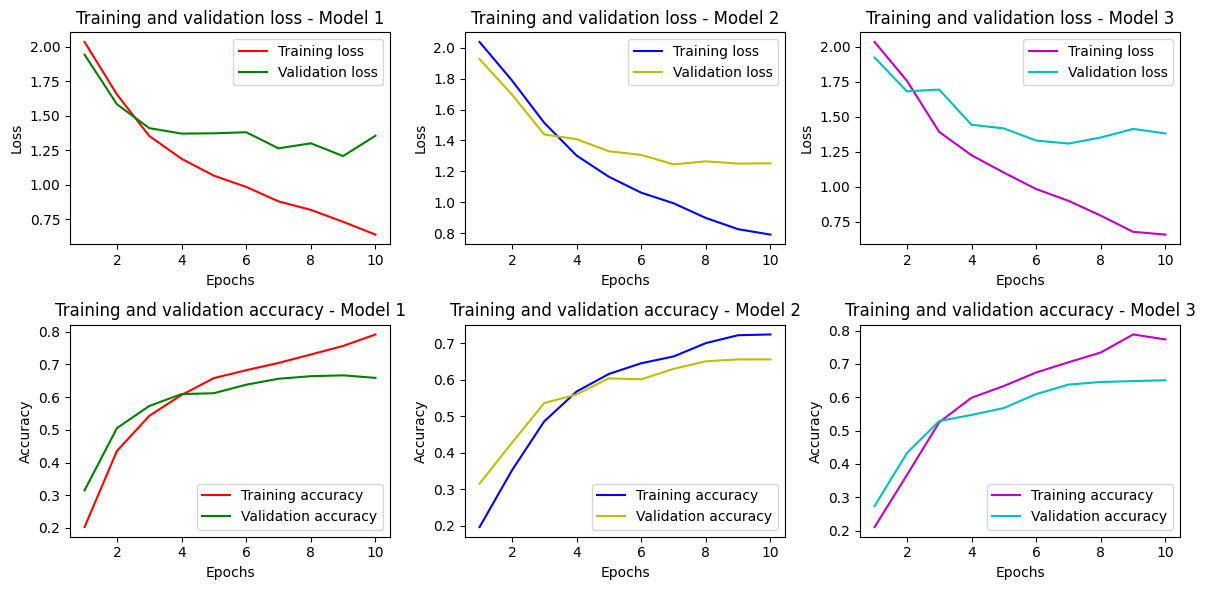

In [12]:
import matplotlib.pyplot as plt

# Lịch sử huấn luyện của mô hình 1
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

# Lịch sử huấn luyện của mô hình 2
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

# Lịch sử huấn luyện của mô hình 3
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

epochs = range(1, len(loss1) + 1)

# Vẽ biểu đồ loss và accuracy cho mô hình 1
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(epochs, loss1, 'r', label='Training loss')
plt.plot(epochs, val_loss1, 'g', label='Validation loss')
plt.title('Training and validation loss - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(epochs, acc1, 'r', label='Training accuracy')
plt.plot(epochs, val_acc1, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ biểu đồ loss và accuracy cho mô hình 2
plt.subplot(2, 3, 2)
plt.plot(epochs, loss2, 'b', label='Training loss')
plt.plot(epochs, val_loss2, 'y', label='Validation loss')
plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(epochs, acc2, 'b', label='Training accuracy')
plt.plot(epochs, val_acc2, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ biểu đồ loss và accuracy cho mô hình 3
plt.subplot(2, 3, 3)
plt.plot(epochs, loss3, 'm', label='Training loss')
plt.plot(epochs, val_loss3, 'c', label='Validation loss')
plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(epochs, acc3, 'm', label='Training accuracy')
plt.plot(epochs, val_acc3, 'c', label='Validation accuracy')
plt.title('Training and validation accuracy - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Tính toán độ chính xác và loss trung bình của mỗi model
def calculate_average(history):
    avg_loss = sum(history.history['loss']) / len(history.history['loss'])
    avg_acc = sum(history.history['accuracy']) / len(history.history['accuracy'])
    return avg_loss, avg_acc

# Tính toán và in ra độ chính xác và loss trung bình của cả 3 model
avg_loss1, avg_acc1 = calculate_average(history1)
avg_loss2, avg_acc2 = calculate_average(history2)
avg_loss3, avg_acc3 = calculate_average(history3)

print("Model 1 - Average Loss:", avg_loss1, "Average Accuracy:", avg_acc1)
print("Model 2 - Average Loss:", avg_loss2, "Average Accuracy:", avg_acc2)
print("Model 3 - Average Loss:", avg_loss3, "Average Accuracy:", avg_acc3)


Model 1 - Average Loss: 1.1341461300849915 Average Accuracy: 0.6110842451453209
Model 2 - Average Loss: 1.2379301488399506 Average Accuracy: 0.567593714594841
Model 3 - Average Loss: 1.1526564419269563 Average Accuracy: 0.600946906208992
